In [1]:
import pandas as pd
import numpy  as np

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data['class'].value_counts() # with the below output we see the label is balanced so no need to do balancing in this case

e    4208
p    3916
Name: class, dtype: int64

In [5]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
data.shape

(8124, 23)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
#With the above observation we see that the dtype object but we will need to change it to category before we turn them into numerics

In [10]:
data = data.astype('category')
data.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [11]:
#Since now the dtype has been changed we can do label encoding to turn them into numerics

In [12]:
LE = LabelEncoder()

In [13]:
for column in data.columns:
    data[column] = LE.fit_transform(data[column])

In [14]:
#Lets check the dataframe again
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [15]:
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns

In [17]:
import warnings
warnings.filterwarnings('ignore')

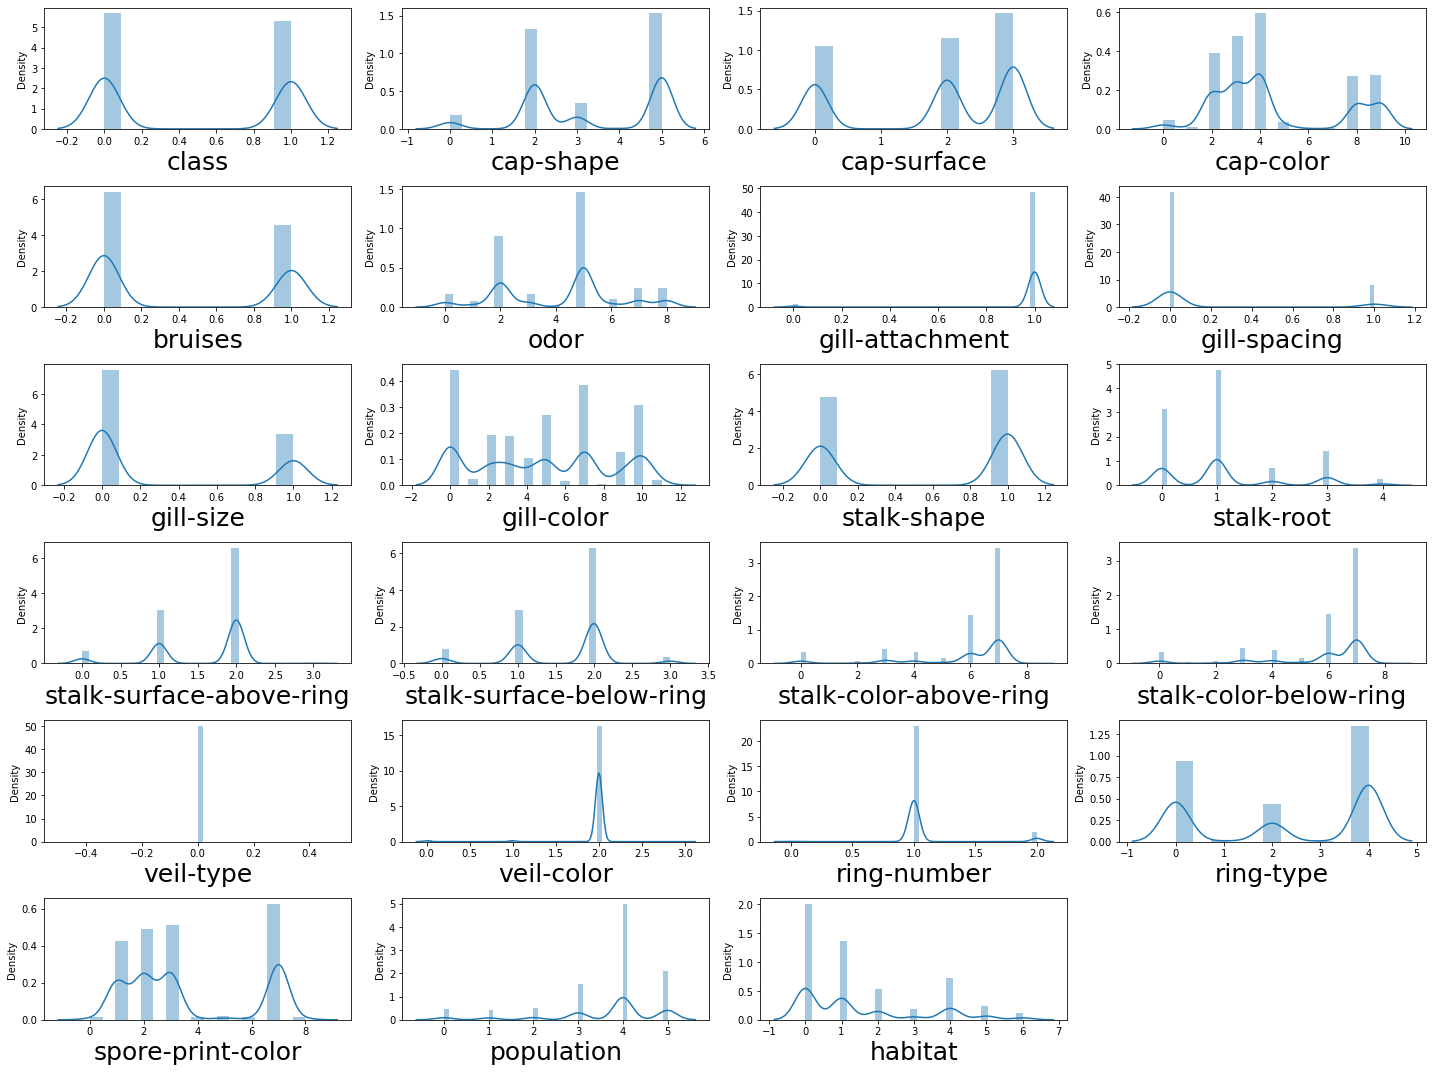

In [18]:
plt.figure(figsize=[20,15])
plotnumber = 1

for column in data:
    if plotnumber <=23:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(data[column],)
        plt.xlabel(column, fontsize = 25)
    plotnumber +=1
plt.tight_layout()

In [19]:
data['ring-number'].value_counts()

1    7488
2     600
0      36
Name: ring-number, dtype: int64

In [20]:
data['veil-type'].value_counts()

0    8124
Name: veil-type, dtype: int64

In [21]:
#we will drop the column veil-type since there are only 0 value in it

In [22]:
data.drop(['veil-type'],axis =1,inplace=True)

In [23]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [24]:
data.shape

(8124, 22)

In [25]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [26]:
data.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [27]:
#Now lets find the correlation

In [28]:
corr_mat = data.corr()
corr_mat

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


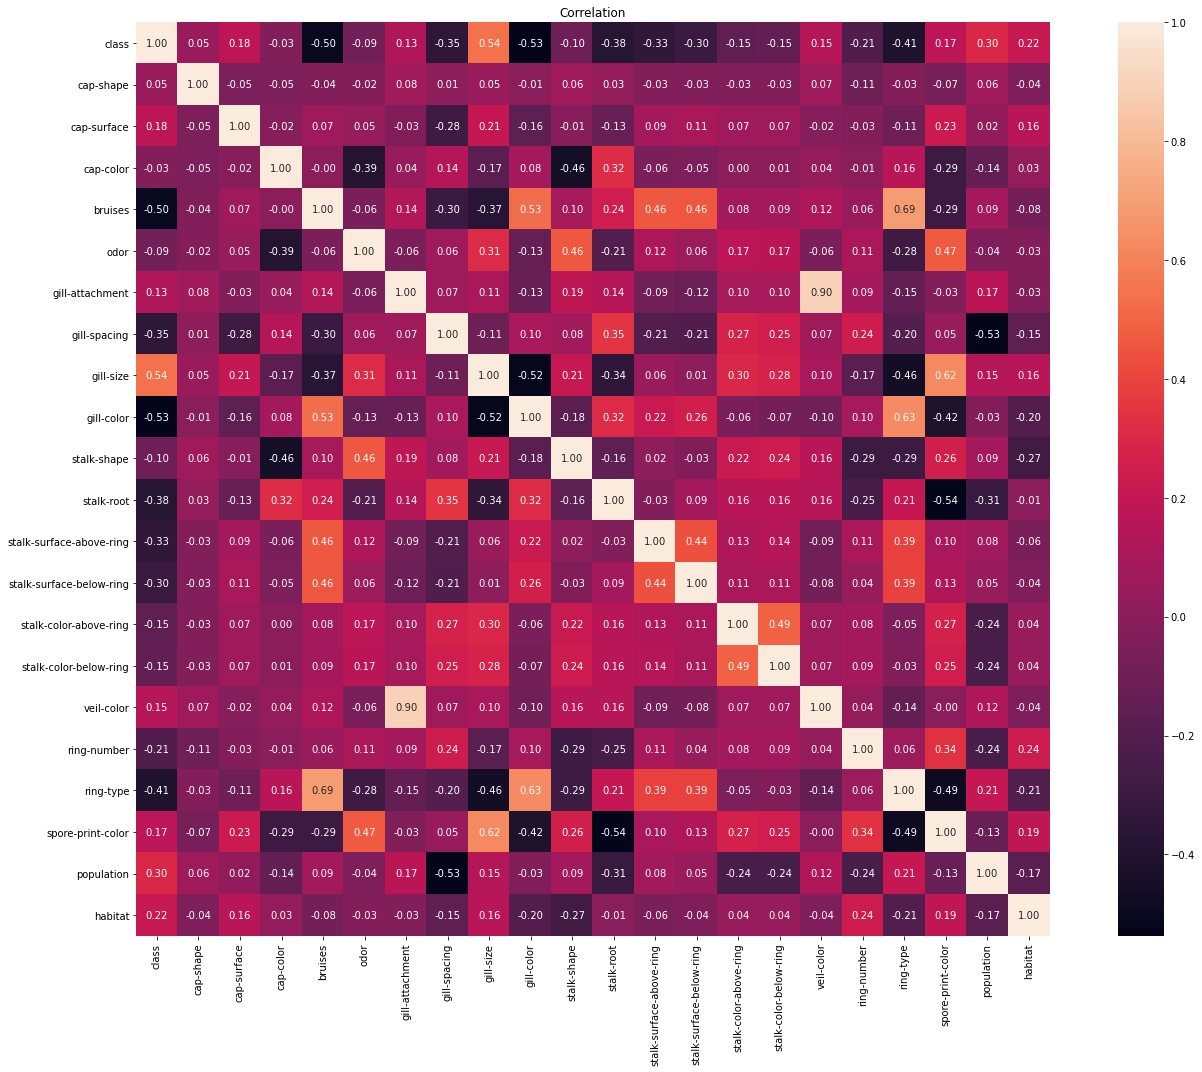

In [29]:
plt.figure(figsize = [20,15])
sns.heatmap(corr_mat,annot=True,cbar=True,square=True,fmt='.2f')
plt.title('Correlation')
plt.tight_layout()

In [30]:
#with the above observation we can see that there is not much relation of cap-color and odor with the class hence will drop them. 

In [31]:
data.drop(columns = ['cap-color','odor'], inplace = True, axis = 1)

In [32]:
data.head(2)

,class,cap-shape,cap-surface,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,1,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,1,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1


In [33]:
data['gill-spacing'].value_counts()

0    6812
1    1312
Name: gill-spacing, dtype: int64

In [34]:
#Selecting features with PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
#Lets scale the data

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
x = data.drop(['class'], axis =1)
y = data['class']

In [40]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [41]:
x_scaled = scaler.fit_transform(x)

In [42]:
x_scaled

array([[ 1.02971224,  0.14012794,  1.18591657, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.18591657, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.18591657, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.84322964, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.84322964, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.84322964, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [43]:
#Now selecting the best features

In [44]:
pca=PCA()

In [45]:
pca.fit_transform(x_scaled)

array([[-0.85019877, -0.61624939, -1.37806552, ..., -0.43718003,
        -0.29811673,  0.12388317],
       [-1.54565348, -0.1278338 , -1.28207588, ...,  0.37026846,
         0.29712816, -0.2839007 ],
       [-1.54643729, -0.37423353, -1.35856523, ...,  0.3521188 ,
         0.35880006, -0.24124933],
       ...,
       [-1.91455593, -1.18016345,  3.21100098, ..., -0.12172733,
        -1.67845336,  0.27784646],
       [ 3.19074094, -1.42562192, -0.1829913 , ...,  0.16797352,
         0.05963272,  0.03879209],
       [-1.97378841, -1.47396645,  2.82737761, ...,  0.77375272,
        -1.01852066,  0.34254572]])

In [46]:
#Screeplot

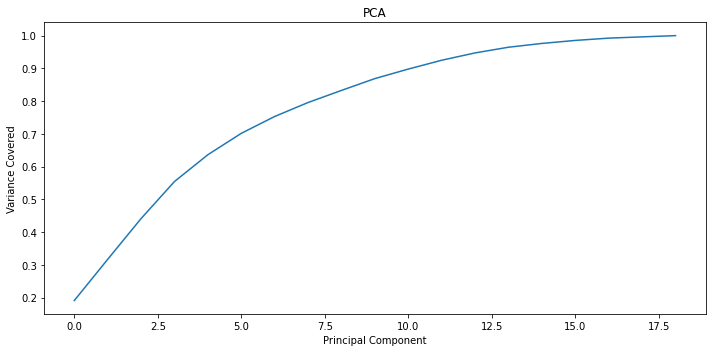

In [47]:
plt.figure(figsize=[10,5])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.tight_layout()

In [48]:
#Selecting the first 15 since it covers almost the every data

In [49]:
pca = PCA(n_components=15)
new_data = pca.fit_transform(x_scaled)
pca_data = pd.DataFrame(new_data, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15'])

In [50]:
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.850199,-0.616249,-1.378066,0.190300,0.787966,-2.767937,1.540681,1.180572,-0.239297,-0.339445,-0.266187,-0.083302,0.122990,0.298356,0.984577
1,-1.545653,-0.127834,-1.282076,0.302501,0.156389,-1.046380,0.995537,-0.243199,0.220002,0.172120,-0.421951,0.243245,-1.323246,0.986979,0.016748
2,-1.546437,-0.374234,-1.358565,1.035414,1.027266,-1.361597,-1.752500,0.717649,0.054357,-0.454070,-0.363141,0.051354,-0.578252,0.768613,0.129711
3,-0.889200,-0.835085,-1.410835,0.223419,0.878979,-3.062934,1.411580,0.620839,-0.150419,0.052565,-0.243899,-0.140174,0.407626,0.222893,0.947516
4,0.618838,2.388157,-2.468911,1.264789,-1.195423,-0.693742,0.828975,-1.399030,1.414732,-0.998858,-1.058860,0.003068,-0.424348,-0.387240,-0.321654


In [51]:
# Deviding the dataset into train and test

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(pca_data,y,test_size=0.25,random_state=340)

In [54]:
#Model Building

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
LR = LogisticRegression()

In [57]:
#For metrics

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [59]:
LR.fit(x_train,y_train)

LogisticRegression()

In [60]:
y_pred = LR.predict(x_test)

In [61]:
accuracy = accuracy_score(y_test,y_pred)

In [62]:
accuracy

0.9428852781880847

In [63]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[990,  40],
       [ 76, 925]], dtype=int64)

In [64]:
#AUC SCORE
roc_auc_score(y_test,y_pred)

0.9426204863098067

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1030
           1       0.96      0.92      0.94      1001

    accuracy                           0.94      2031
   macro avg       0.94      0.94      0.94      2031
weighted avg       0.94      0.94      0.94      2031



In [87]:
## Lets see which model will give the best output

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [92]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()

In [94]:
#training with the all of them

lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)

print("All Models Trained")

All Models Trained


In [96]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)

print("All scores Captured")

All scores Captured


In [97]:
#Lets check the roc_auc_score
#for Logistic Regression
roc_auc_score(y_test,lr.predict(x_test))

0.9426204863098067

In [98]:
#for Decision Tree
roc_auc_score(y_test,dt.predict(x_test))

1.0

In [100]:
#for Random Forest
roc_auc_score(y_test,rf.predict(x_test))

1.0

In [101]:
#for KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

1.0

In [102]:
#Now plotting roc_auc_curve for all the columns

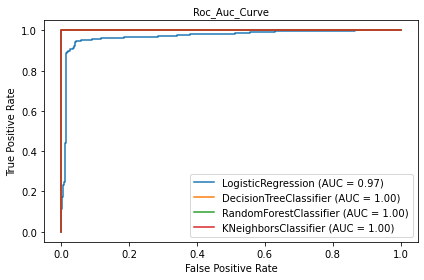

In [111]:
curve = plot_roc_curve(lr,x_test,y_test)

plot_roc_curve(dt,x_test,y_test,ax=curve.ax_)

plot_roc_curve(rf,x_test,y_test,ax=curve.ax_)

plot_roc_curve(kn,x_test,y_test,ax=curve.ax_)

plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

### With above plotting we can see that any one of Decision Tree, Random Forest, KNeighbors Models will work best for this dataset.

In [104]:
#Will choose Random Forest

In [105]:
RFC = RandomForestClassifier(criterion='entropy',n_estimators=100, random_state=40)

In [106]:
RFC.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=40)

In [107]:
y_pred =RFC.predict(x_test)

In [108]:
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
roc = roc_auc_score(y_test,y_pred)
cr =classification_report(y_test,y_pred)

In [109]:
print("\nAccuracy Score ===>", accuracy)
print("\nConfusion Matrix===>\n",conf_mat)
print("\nROC_AUC_SCORE==>",roc)


Accuracy Score ===> 1.0

Confusion Matrix===>
 [[1030    0]
 [   0 1001]]

ROC_AUC_SCORE==> 1.0


In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1030
           1       1.00      1.00      1.00      1001

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

